<a href="https://colab.research.google.com/github/Henriquedelira/estatistica1/blob/main/Estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Projeto Estatística - ADA**

## **Aluno: Henrique Santos de Lira N° 1116018**


## Objetivo:

Entender se o peso de um diamante está associado ao seu preço.

Hipótese: Quanto maior mais caro?

## Base de Dados

Será utilizado um conjunto de dados público referente a diamantes, que contém informações detalhadas sobre cada diamante, incluindo características como peso, qualidade do corte, cor, clareza e dimensões físicas. Esses dados nos fornecem insights sobre a qualidade e valor dos diamantes com base em suas características intrínsecas.

## Motivação

Este projeto visa identificar as estatísticas descritivas, entender as possíveis distribuições, interpretar as correlações entre as variáveis quantitativas e explorar um teste de hipótese que possa avaliar se há variação no preço dos diamantes em função de outra variável a ser escolhida.

# Ferramentas

Seaborn, Pandas, NumPy e Matplotlib.

# Importação das Bibliotecas

Faremos a importação das seguintes bibliotecas:

**Seaborn** - Utilizado para criação de visualizações estatísticas complexas e informativas, que são úteis para explorar e comunicar padrões nos dados.

**Pandas** - Importamos com o alias pd para carregar, manipular e analisar dados tabulares.

**NumPy** - Importamos com o alias np para aproveitar suas funções matemáticas e operações de matriz.

**Matplotlib** - Utilizado para a criação de visualizações de alta qualidade, como gráficos, histogramas, diagramas de dispersão e muito mais.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

#Base de Dados utilizada:

Visualizados atráves do código abaixo os datasets disponíveis na biblioteca Seaborn.

In [ ]:
datasets = sns.get_dataset_names()
print(datasets)

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


Com base nos dados disponíveis, foi escolhido o dataset Diamonds que apresenta uma gama enorme de informações sobre o preço, tamanho entre outras informações sobre Diamantes comercializados no mundo.

In [ ]:
diamonds = sns.load_dataset('diamonds')

Visualizando o tamanho do dataset através da função shape.

In [ ]:
diamonds.shape

(53940, 10)

Identificado que o dataset, possui mais de 50mil registros distribuidos em 10 colunas.

Agora rodaremos a função info() para identificar as colunas disponíveis no dataset e também identificar se possui algum registro nulo.

In [ ]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

Foram identificadas as colunas:

**carat**: Peso do diamante em quilates (variável numérica).

**cut**: Qualidade do corte do diamante.

**color**: Cor do diamante.

**clarity**: Clareza do diamante.

**depth**: Profundidade total do diamante em percentual (variável numérica).

**table**: Largura do topo do diamante em relação à parte mais larga (variável numérica).

**price**: Preço em dólares do diamante (variável numérica).

**x**: Comprimento em mm (variável numérica).

**y**: Largura em mm (variável numérica).

**z**: Profundidade em mm (variável numérica).

**Visualizando os dados do dataframe**

In [ ]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Para melhor entendimento vamos renomear as colunas:

In [ ]:
# Novos nomes das colunas em português
nomes_colunas = {
    'carat': 'Peso',
    'cut': 'Corte',
    'color': 'Cor',
    'clarity': 'Clareza',
    'depth': 'Profundidade',
    'table': 'Tabela',
    'price': 'Preço',
    'x': 'Comprimento (x)',
    'y': 'Largura (y)',
    'z': 'Profundidade (z)'
}

# Renomeando as colunas
diamonds = diamonds.rename(columns=nomes_colunas)

Visualização após alteração dos nomes das colunas:

In [ ]:
diamonds.head()

,Peso,Corte,Cor,Clareza,Profundidade,Tabela,Preço,Comprimento (x),Largura (y),Profundidade (z)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


A primeira avaliação que faremos é identificar se o menor diamante é o mais barato e se o maior é o mais caro.

Utilizada as funções idxmin e idxmax.

In [ ]:
#Identificando atráves da função idxmin qual o registro com o menor PESO de diamante.
menor_peso = diamonds.loc[diamonds["Peso"].idxmin()]

#Identificando atráves da função idxmin qual o registro com o maior PESO de diamante.
maior_peso = diamonds.loc[diamonds["Peso"].idxmax()]

#Identificando atráves da função idxmin qual o registro com o menor PREÇO de diamante.
menor_valor = diamonds.loc[diamonds["Preço"].idxmin()]

#Identificando atráves da função idxmin qual o registro com o menor PREÇO de diamante.
maior_valor = diamonds.loc[diamonds["Preço"].idxmax()]

print("Registro com menor peso:")
print(menor_peso)
print("\nRegistro com maior peso:")
print(maior_peso)
print("\nRegistro com menor valor:")
print(menor_valor)
print("\nRegistro com maior valor:")
print(maior_valor)

Registro com menor peso:
Peso                    0.2
Corte               Premium
Cor                       E
Clareza                 SI2
Profundidade           60.2
Tabela                 62.0
Preço                   345
Comprimento (x)        3.79
Largura (y)            3.75
Profundidade (z)       2.27
Name: 14, dtype: object

Registro com maior peso:
Peso                 5.01
Corte                Fair
Cor                     J
Clareza                I1
Profundidade         65.5
Tabela               59.0
Preço               18018
Comprimento (x)     10.74
Largura (y)         10.54
Profundidade (z)     6.98
Name: 27415, dtype: object

Registro com menor valor:
Peso                 0.23
Corte               Ideal
Cor                     E
Clareza               SI2
Profundidade         61.5
Tabela               55.0
Preço                 326
Comprimento (x)      3.95
Largura (y)          3.98
Profundidade (z)     2.43
Name: 0, dtype: object

Registro com maior valor:
Peso                 

**Conclusão:** Com base no retorno do código anterior, já podemos identificar que o preço não é diretamente ligado ao preço, pois o menor diamante não é o mais barato e nem o maior é o mais caro.

O próximo passo é identificar quais os tipos de Corte, Cor e Clareza, temos em nossa tabela.

Para isso utilizaremos o método unique.

In [ ]:
# Tipos únicos de corte
tipos_corte = diamonds['Corte'].unique()

# Tipos únicos de cor
tipos_cor = diamonds['Cor'].unique()

# Tipos únicos de clareza
tipos_clareza = diamonds['Clareza'].unique()

print("Tipos de Corte:", tipos_corte)
print("Tipos de Cor:", tipos_cor)
print("Tipos de Clareza:", tipos_clareza)

Tipos de Corte: ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
Tipos de Cor: ['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']
Tipos de Clareza: ['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


Com base nesse retonor e após pesquisa no site da loja Shimansky (https://www.shimansky.co.za/pt/pages/descubra-5cs-de-cor-de-classificacao-de-diamante)

## Temos as seguintes classificações de cores:

**D:** Absolutamente incolor. O mais raro e valioso. Menos de 1% dos diamantes extraídos em todo o mundo são classificados como cor D.

**E – F:** Também considerado incolor, embora seja um traço mínimo de cor que só pode ser detectado por um gemologista especialista. Menos raro que D e mais valioso que G – H.

**G – H:** Quase incolor. A olho nu, estes diamantes parecem límpidos e incolores, embora também contenham minúsculos traços de cor. Menos raro que E –F, mas mais valioso que I – J.

**I – J:** Quase incolor com um leve tom de amarelo. Menos raro que G – H, mas mais valioso que K – L.

**K  - L:** Uma tonalidade amarela fraca que é visível a olho nu. Menos raro que I – J, mas ligeiramente mais valioso que M – N.

**M – Z:** Uma tonalidade amarela muito clara, facilmente identificada a olho nu. Menos valioso do grau de cor do diamante.

## Classificação de clareza:

**IF (Internally Flawless):** Diamantes nesta categoria não possuem inclusões internas visíveis sob ampliação de 10x, mas podem apresentar pequenas falhas externas.

**VVS1 e VVS2 (Very, Very Slightly Included):** Diamantes nesta categoria possuem inclusões muito pequenas que são extremamente difíceis de detectar mesmo sob ampliação de 10x.

**VS1 e VS2 (Very Slightly Included):** Diamantes nesta categoria possuem inclusões pequenas que são difíceis de detectar sob ampliação de 10x.

**SI1 e SI2 (Slightly Included):** Diamantes nesta categoria possuem inclusões visíveis sob ampliação de 10x, mas geralmente não são visíveis a olho nu.

**I1 (Included):** Diamantes nesta categoria possuem inclusões visíveis a olho nu que podem afetar a aparência e a durabilidade do diamante.

## Cortes:

**Ideal:** Diamantes com este tipo de corte são lapidados para maximizar o brilho e o fogo, refletindo a luz internamente de volta para o observador. Eles são conhecidos por sua simetria e proporções precisas, resultando em uma aparência excepcionalmente brilhante e deslumbrante.

**Premium**: Este tipo de corte oferece um equilíbrio entre qualidade e valor. Diamantes com corte premium ainda têm boa proporção e simetria, proporcionando um brilho impressionante, embora possam não ser tão excepcionais quanto os diamantes ideais em termos de brilho e fogo.

**Very Good (Muito Bom):** Diamantes com este tipo de corte possuem proporções e simetria muito boas, oferecendo um brilho considerável. Embora possam não ter a mesma excelência de corte que os diamantes ideais ou premium, eles ainda proporcionam uma aparência atraente e são uma escolha popular para aqueles que buscam um bom equilíbrio entre qualidade e preço.

**Good (Bom):** Diamantes com este tipo de corte têm proporções aceitáveis, mas podem apresentar algumas imperfeições visuais. Embora ainda ofereçam brilho, podem não ter o mesmo nível de fogo e brilho que os cortes de qualidade superior.

**Fair (Regular):** Este é o tipo de corte de diamante de qualidade mais baixa. Diamantes com corte regular podem ter proporções irregulares e simetria comprometida, resultando em uma aparência menos brilhante e menos desejável em comparação com cortes de qualidade superior.

Identificamos a frequência relatica de cada categoria, utilizando o value_counts com o normalize TRUE.



In [ ]:
#Frequência relativa para Corte
freq_relativa_corte = diamonds['Corte'].value_counts(normalize=True)

# Frequência relativa para Cor
freq_relativa_cor = diamonds['Cor'].value_counts(normalize=True)

# Frequência relativa para Clareza
freq_relativa_clareza = diamonds['Clareza'].value_counts(normalize=True)

print("Frequência relativa de cada categoria de corte:")
print(freq_relativa_corte)
print("\nFrequência relativa de cada categoria de cor:")
print(freq_relativa_cor)
print("\nFrequência relativa de cada categoria de clareza:")
print(freq_relativa_clareza)

Frequência relativa de cada categoria de corte:
Corte
Ideal        0.399537
Premium      0.255673
Very Good    0.223990
Good         0.090953
Fair         0.029848
Name: proportion, dtype: float64

Frequência relativa de cada categoria de cor:
Cor
G    0.209344
E    0.181628
F    0.176900
H    0.153949
D    0.125603
I    0.100519
J    0.052058
Name: proportion, dtype: float64

Frequência relativa de cada categoria de clareza:
Clareza
SI1     0.242214
VS2     0.227253
SI2     0.170449
VS1     0.151483
VVS2    0.093919
VVS1    0.067760
IF      0.033185
I1      0.013737
Name: proportion, dtype: float64


Conclusão:

Temos quase 40% dos registros no Corte Ideal e apenas 0,02% em Fair.

Para cor temos uma distribuição mais equilibrada, porém o J apresenta apenas 0,05%.

Em relação a Clareza os dois maiores valores estão em SI2 24,22% e VS2 22,72% enquanto que os registro de IF são de 0,03% e I1 apenas 0,01%.

Abaixo, utilizando o matplotlib plotaremos 3 gráficos de barra para melhor visualização das ocorrencias de cada categoria.

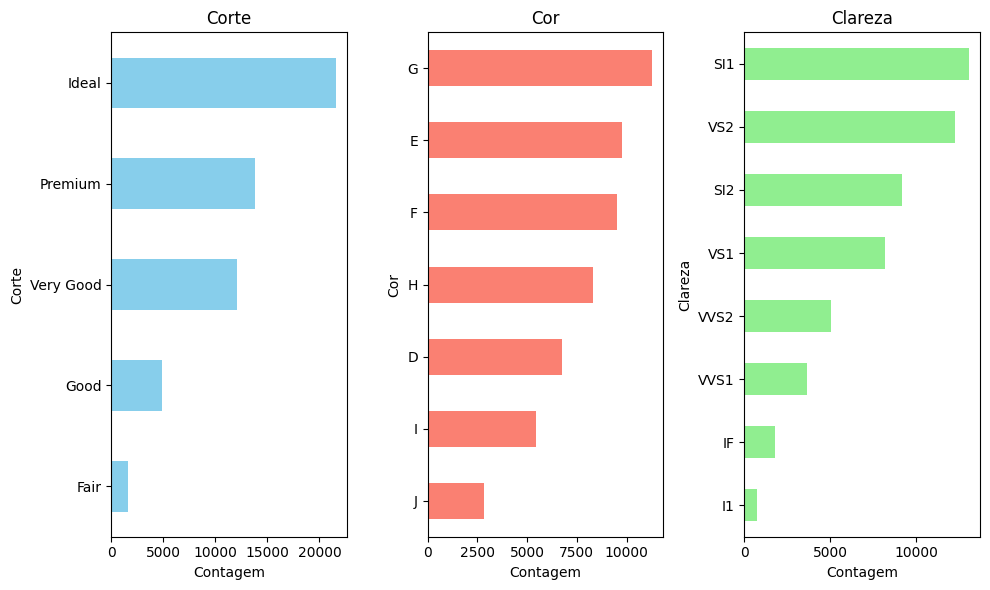

In [ ]:
#Definindo o tamanho do gráfico
plt.figure(figsize=(10, 6))

#Realizando a contagem de valores e ordenando do maior para o menor na coluna Corte
contagem_corte = diamonds['Corte'].value_counts().sort_values(ascending=True)

#Realizando a contagem de valores e ordenando do maior para o menor na coluna Cor
contagem_cor = diamonds['Cor'].value_counts().sort_values(ascending=True)

#Realizando a contagem de valores e ordenando do maior para o menor na coluna Clareza
contagem_clareza = diamonds['Clareza'].value_counts().sort_values(ascending=True)

#Montando o gráfico de Corte x Contagem
plt.subplot(1, 3, 1)
contagem_corte.plot(kind='barh', color='skyblue')
plt.title('Corte')
plt.xlabel('Contagem')

#Montando o gráfico de Corte x Contagem
plt.subplot(1, 3, 2)
contagem_cor.plot(kind='barh', color='salmon')
plt.title('Cor')
plt.xlabel('Contagem')

#Montando o gráfico de Corte x Contagem
plt.subplot(1, 3, 3)
contagem_clareza.plot(kind='barh', color='lightgreen')
plt.title('Clareza')
plt.xlabel('Contagem')

#Ajustar o layout
plt.tight_layout()

#Plotando o gráfico
plt.show()

#Análise Exploratória Univariada

Vamos verificar as informações estatísticas das variáveis quantitativas.

## PESO

In [ ]:
diamonds['Peso'].describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: Peso, dtype: float64

In [ ]:
diamonds['Peso'].mode()

0    0.3
Name: Peso, dtype: float64

In [ ]:
diamonds['Peso'].var()

0.22468665982277333

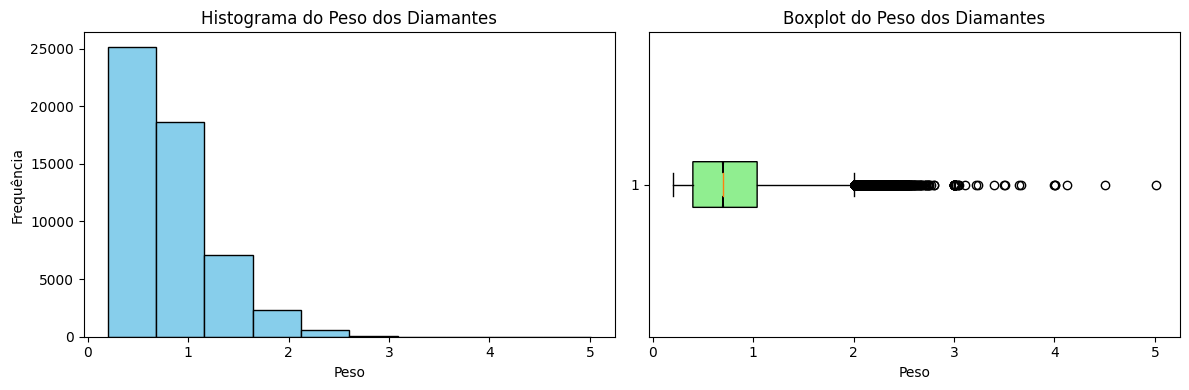

In [ ]:
#Definindo o tamanho dos gráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

#Gráfico de Histograma
axs[0].hist(diamonds['Peso'], color='skyblue', edgecolor='black')
axs[0].set_title('Histograma do Peso dos Diamantes')
axs[0].set_xlabel('Peso')
axs[0].set_ylabel('Frequência')

#Box Plot
axs[1].boxplot(diamonds['Peso'], patch_artist=True, notch=True, vert=False, boxprops=dict(facecolor='lightgreen'))
axs[1].set_title('Boxplot do Peso dos Diamantes')
axs[1].set_xlabel('Peso')

#Ajustar o layout
plt.tight_layout()

#Plotando o gráfico
plt.show()

In [ ]:
#Calculando a assimetria
diamonds['Peso'].skew()

1.116645920812613

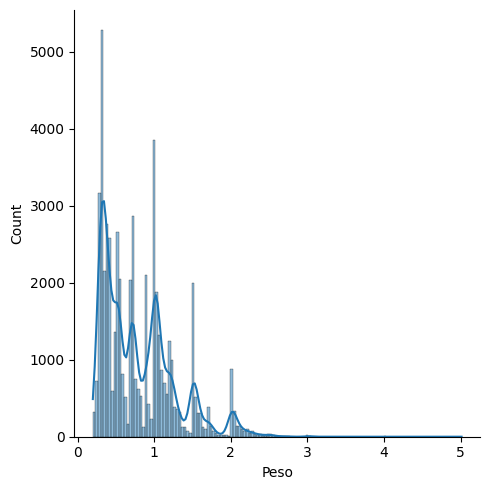

In [ ]:
#Gráfico de distribuição
sns.displot(diamonds['Peso'], kde=True)

Conclusão:

Após a análise exploratória do dataframe, observamos que o peso médio dos diamantes é de aproximadamente 0,798 quilates, com um desvio padrão de cerca de 0,474 quilates. A distribuição dos pesos dos diamantes apresenta assimetria positiva, como indicado pelo coeficiente de assimetria de aproximadamente 1,117. Isso significa que a cauda da distribuição estende-se mais para o lado direito, com uma proporção maior de diamantes com pesos mais altos.

Os valores variam de 0,20 a 5,01 quilates, com a mediana do peso sendo 0,70 quilates e quartis de 25% e 75% em 0,40 e 1,04 quilates, respectivamente. O gráfico de boxplot revela a presença de outliers nos valores de peso, sugerindo uma dispersão significativa dos dados.

A moda do peso dos diamantes é de 0,3 quilates, indicando que este é o valor mais frequente.

##PREÇO

In [ ]:
diamonds['Preço'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: Preço, dtype: float64

In [ ]:
diamonds['Preço'].mode()

0    605
Name: Preço, dtype: int64

In [ ]:
diamonds['Preço'].var()

15915629.42430145

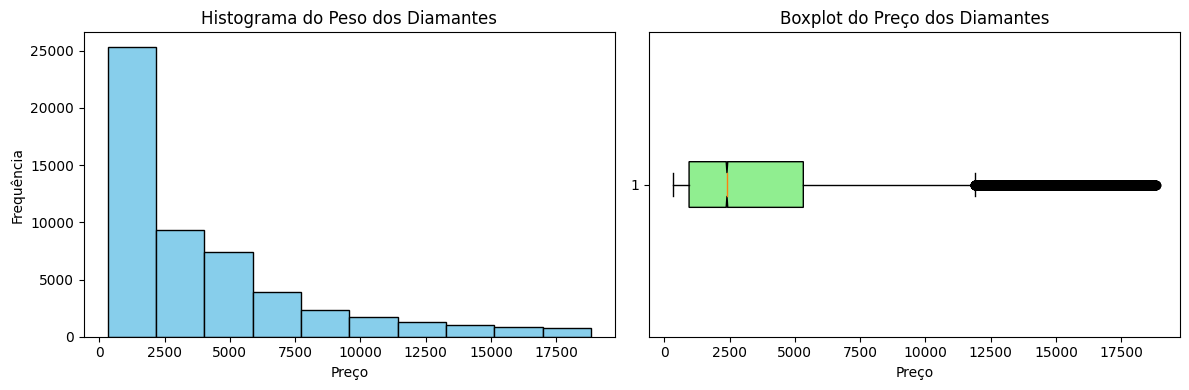

In [ ]:
#Definindo o tamanho dos gráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

#Gráfico de Histograma
axs[0].hist(diamonds['Preço'], color='skyblue', edgecolor='black')
axs[0].set_title('Histograma do Peso dos Diamantes')
axs[0].set_xlabel('Preço')
axs[0].set_ylabel('Frequência')

#Box Plot
axs[1].boxplot(diamonds['Preço'], patch_artist=True, notch=True, vert=False, boxprops=dict(facecolor='lightgreen'))
axs[1].set_title('Boxplot do Preço dos Diamantes')
axs[1].set_xlabel('Preço')

#Ajustar o layout
plt.tight_layout()

#Plotando o gráfico
plt.show()

In [ ]:
#Calculando a assimetria
diamonds['Preço'].skew()

1.618395283383529

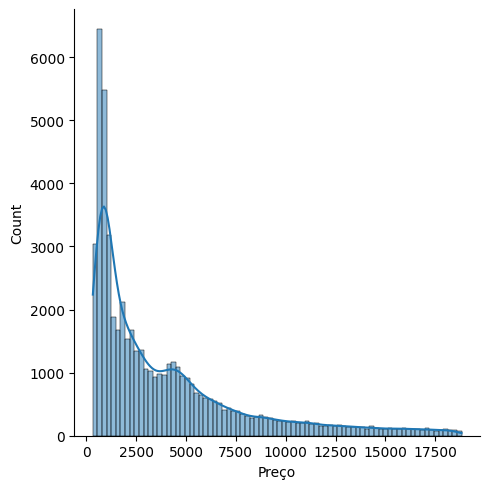

In [ ]:
#Gráfico de distribuição
sns.displot(diamonds['Preço'], kde=True)

Conclusão:

Podemos observar que o preço médio dos diamantes é de aproximadamente 3932,80, com um desvio padrão de aproximadamente 3989,44. A distribuição dos preços dos diamantes parece ser assimétrica e fortemente positiva, como evidenciado pelo coeficiente de assimetria de 1,618. Isso indica uma cauda mais longa à direita na distribuição dos preços. O menor preço observado é 326, enquanto o maior preço é 18.823. A mediana do preço é de 2.401, e o quartil de 25% é de 950, enquanto o quartil de 75% é de 5.324, sugerindo uma distribuição com uma grande variabilidade nos preços.

Ao observar o gráfico de boxplot, notamos a presença de muitos outliers nos valores de preço, indicando uma dispersão significativa dos dados. A moda do preço dos diamantes é de 605, o que significa que este é o valor mais frequente.

# Análise Exploratória Multivariada

Vamos explorar a relação entre as variáveis Peso e Preço, através da correlaçã e a covariância.

In [ ]:
correlation = diamonds['Peso'].corr(diamonds['Preço'])
covariance = diamonds['Peso'].cov(diamonds['Preço'])

print("Correlação entre Peso e Preço:", correlation)
print("Covariância entre Peso e Preço:", covariance)

Correlação entre Peso e Preço: 0.9215913011934771
Covariância entre Peso e Preço: 1742.7653642651187


<Axes: xlabel='Peso', ylabel='Preço'>

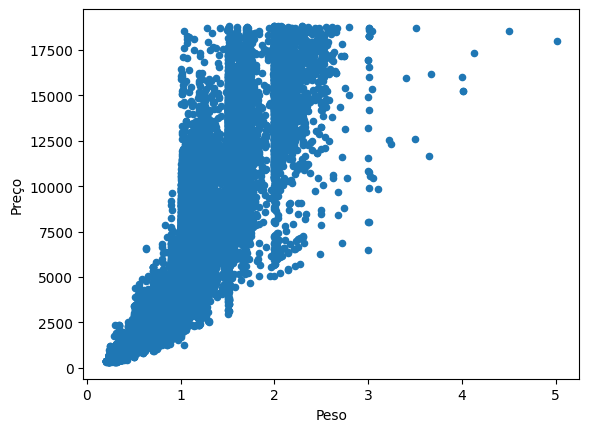

In [ ]:
diamonds.plot(x='Peso', y='Preço', kind='scatter')

Conclusão:

A correlação entre o peso e o preço dos diamantes é de aproximadamente 0,922, o que indica uma forte correlação positiva entre essas duas variáveis. Isso significa que, em geral, quanto maior o peso do diamante, maior será o preço, e vice-versa.

Já a covariância entre o peso e o preço é de aproximadamente 1742,77. Isso sugere uma relação linear positiva entre as duas variáveis, o que é consistente com a alta correlação positiva observada. Uma covariância positiva indica que, em média, quando uma variável aumenta, a outra também tende a aumentar.

Esses resultados sugerem que o peso é um fator importante na determinação do preço de um diamante, e há uma relação forte e positiva entre essas duas variáveis.

# Probabilidades

Nesse tópico, iremos calcular as probabilidades condicionais para diferentes combinações de preço e peso de diamantes.

In [ ]:
#Identificamos os preços e pesos mais comuns no dataset
preco_mais_comum = diamonds['Preço'].mode()[0]
peso_mais_comum = diamonds['Peso'].mode()[0]

def prob_peso_dado_preco(preco, peso):
    #Filtrando os diamantes com o preço especificado
    diamonds_preco = diamonds[diamonds['Preço'] == preco]
    #Cálculo da probabilidade condicional do peso dado o preço
    prob_condicional = len(diamonds_preco[diamonds_preco['Peso'] == peso]) / len(diamonds_preco)
    return prob_condicional

#Cálculo da probabilidade condicional
probabilidade_condicional = prob_peso_dado_preco(preco_mais_comum, peso_mais_comum)
print(f"Probabilidade condicional para preço de {preco_mais_comum} e peso de {peso_mais_comum} quilates é de {probabilidade_condicional:.2f}")

Probabilidade condicional para preço de 605 e peso de 0.3 quilates é de 0.89


Conclusão:

A análise de probabilidade condicional entre preço e peso dos diamantes revelou uma forte relação entre essas variáveis.

# Teste de Hipótese



Agora vamos tentar responder ao nosso questionamento inicial:

###Quanto maior mais caro?

In [ ]:
#Calcular a correlação entre peso e preço
correlation, p_value = pearsonr(diamonds['Peso'], diamonds['Preço'])

#Interpretar os resultados do teste de hipótese
alpha = 0.05  #Nível de significância
if p_value < alpha:
    print(f"A correlação entre peso e preço é estatisticamente significativa (p-value = {p_value:.4f}).")
    print("Isso sugere que há uma relação significativa entre peso e preço dos diamantes.")
else:
    print(f"A correlação entre peso e preço não é estatisticamente significativa (p-value = {p_value:.4f}).")
    print("Isso sugere que não há uma relação significativa entre peso e preço dos diamantes.")

#Exibir o valor da correlação
print(f"Correlação entre peso e preço: {correlation:.4f}")

A correlação entre peso e preço é estatisticamente significativa (p-value = 0.0000).
Isso sugere que há uma relação significativa entre peso e preço dos diamantes.
Correlação entre peso e preço: 0.9216


Conclusão:

Com um valor-p extremamente baixo (p-value = 0.0000), podemos afirmar que a correlação entre peso e preço dos diamantes é estatisticamente significativa. A alta correlação positiva de 0.9216 indica que há uma relação forte e positiva entre o peso e o preço dos diamantes. Ou seja, a medida que o peso dos diamantes aumenta, seus preços tendem a aumentar. Este resultado fornece uma base estatística robusta para confirmar a hipótese de que quanto maior o peso, maior o preço dos diamantes.

# Análises adicionais

Separando em dois dataframes, um com os itens mais "nobres" e o outro com os itens menores atraentes.

In [ ]:
#Criando o dataframe com os itens mais simples
diamonds_basicos = diamonds[((diamonds['Corte'] == 'Good') | (diamonds['Corte'] == 'Fair')) &
                                  ((diamonds['Clareza'] == 'SI1') | (diamonds['Clareza'] == 'SI2')) &
                                  ((diamonds['Cor'] == 'I') | (diamonds['Cor'] == 'J'))]

#Criando o dataframe com os itens mais top
diamonds_top = diamonds[~(((diamonds['Corte'] == 'Good') | (diamonds['Corte'] == 'Fair')) &
                        ((diamonds['Clareza'] == 'SI1') | (diamonds['Clareza'] == 'SI2')) &
                        ((diamonds['Cor'] == 'I') | (diamonds['Cor'] == 'J')))]


In [ ]:
#Calcular a correlação entre peso e preço
correlation, p_value = pearsonr(diamonds_basicos['Peso'], diamonds_basicos['Preço'])

#Interpretar os resultados do teste de hipótese
alpha = 0.05  #Nível de significância
if p_value < alpha:
    print(f"A correlação entre peso e preço é estatisticamente significativa (p-value = {p_value:.4f}).")
    print("Isso sugere que há uma relação significativa entre peso e preço dos diamantes.")
else:
    print(f"A correlação entre peso e preço não é estatisticamente significativa (p-value = {p_value:.4f}).")
    print("Isso sugere que não há uma relação significativa entre peso e preço dos diamantes.")

#Exibir o valor da correlação
print(f"Correlação entre peso e preço: {correlation:.4f}")

A correlação entre peso e preço é estatisticamente significativa (p-value = 0.0000).
Isso sugere que há uma relação significativa entre peso e preço dos diamantes.
Correlação entre peso e preço: 0.9566


In [ ]:
#Calcular a correlação entre peso e preço
correlation, p_value = pearsonr(diamonds_top['Peso'], diamonds_top['Preço'])

#Interpretar os resultados do teste de hipótese
alpha = 0.05  #Nível de significância
if p_value < alpha:
    print(f"A correlação entre peso e preço é estatisticamente significativa (p-value = {p_value:.4f}).")
    print("Isso sugere que há uma relação significativa entre peso e preço dos diamantes.")
else:
    print(f"A correlação entre peso e preço não é estatisticamente significativa (p-value = {p_value:.4f}).")
    print("Isso sugere que não há uma relação significativa entre peso e preço dos diamantes.")

#Exibir o valor da correlação
print(f"Correlação entre peso e preço: {correlation:.4f}")

A correlação entre peso e preço é estatisticamente significativa (p-value = 0.0000).
Isso sugere que há uma relação significativa entre peso e preço dos diamantes.
Correlação entre peso e preço: 0.9222


Conclusão:

 Podemos concluir que houve pouca variação na correlação entre peso e preço nos testes realizados nos DataFrames "básico" e "top". Embora os valores de correlação tenham sido ligeiramente diferentes entre os DataFrames, a diferença não foi significativa. Isso indica que, independentemente das características dos diamantes, a relação entre o peso e o preço é consistentemente forte e positiva.

 Portanto, a correlação entre peso e preço dos diamantes parece ser robusta e estável, não importando as características específicas dos diamantes considerados.

# Desafio Bônus

Criar um código no qual o usuário informe o valor que deseja gastar, bem como a cor e o tipo de corte desejado para um diamante. O programa então busca na base de dados por uma combinação correspondente. Se encontrar, retorna o peso médio do diamante para a solicitação.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Função para obter as opções válidas de cores
def obter_opcoes_cores():
    cores_validas = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
    return ', '.join(cores_validas)

# Função para mapear os índices numéricos de cores de volta para as letras correspondentes
def mapear_indices_cores(cores_indices):
    cor_indices = {0: 'D', 1: 'E', 2: 'F', 3: 'G', 4: 'H', 5: 'I', 6: 'J'}
    return [cor_indices.get(i) for i in cores_indices]

# Função para verificar as cores disponíveis para uma combinação de preço e corte
def verificar_cores_disponiveis(preco, corte):
    diamonds_filtrados = diamonds_copy[
        (diamonds_copy['Preço'] >= preco - margem_tolerancia) &
        (diamonds_copy['Preço'] <= preco + margem_tolerancia) &
        (diamonds_copy['Corte'] == corte)
    ]
    if not diamonds_filtrados.empty:
        cores_disponiveis = diamonds_filtrados['Cor'].unique()
        return cores_disponiveis
    else:
        return None

# Solicitar ao usuário o preço desejado
while True:
    preco_desejado = float(input("Digite o preço desejado (entre 300 e 18000): "))
    if 300 <= preco_desejado <= 18000:
        break
    else:
        print("Por favor, digite um preço dentro do intervalo de 300 a 18000.")

# Solicitar ao usuário o corte desejado
corte_desejado = input("Digite o corte desejado (Fair, Good, Very Good, Premium, Ideal): ").lower()

# Solicitar ao usuário a cor desejada
while True:
    cor_desejada = input(f"Digite a cor desejada ({obter_opcoes_cores()}): ").upper()
    if cor_desejada in obter_opcoes_cores().split(', '):
        break
    else:
        print("Por favor, digite uma cor válida.")

# Transformar o corte em um índice numérico
corte_indices = {'fair': 0, 'good': 1, 'very good': 2, 'premium': 3, 'ideal': 4}
indice_corte = corte_indices.get(corte_desejado)

# Transformar a cor em um índice numérico
cor_indices = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}
indice_cor = cor_indices.get(cor_desejada)

if indice_corte is None:
    print("Por favor, escolha um corte válido.")
elif indice_cor is None:
    print("Por favor, escolha uma cor válida.")
else:
    # Criar uma cópia do DataFrame diamonds para não modificar o original
    diamonds_copy = diamonds.copy()

    # Definir a margem de tolerância como 10% do preço desejado
    margem_tolerancia = preco_desejado * 0.1

    # Instanciar o LabelEncoder
    label_encoder = LabelEncoder()

    # Ajustar e transformar as colunas 'Corte' e 'Cor' em índices numéricos
    diamonds_copy['Corte'] = label_encoder.fit_transform(diamonds_copy['Corte'])
    diamonds_copy['Cor'] = label_encoder.fit_transform(diamonds_copy['Cor'])

    # Filtrar o DataFrame para obter apenas as linhas com o preço aproximado, corte e cor desejados
    diamonds_filtrados = diamonds_copy[
        (diamonds_copy['Preço'] >= preco_desejado - margem_tolerancia) &
        (diamonds_copy['Preço'] <= preco_desejado + margem_tolerancia) &
        (diamonds_copy['Corte'] == indice_corte) &
        (diamonds_copy['Cor'] == indice_cor)
    ]

    # Verificar se há linhas filtradas
    if not diamonds_filtrados.empty:
        # Calcular o peso médio dos diamantes filtrados
        peso_previsto = diamonds_filtrados['Peso'].mean()

        # Exibir o peso previsto do diamante
        print("Peso previsto do diamante:", peso_previsto)
    else:
        # Verificar as cores disponíveis para essa combinação de preço e corte
        cores_disponiveis = verificar_cores_disponiveis(preco_desejado, indice_corte)

        if cores_disponiveis is not None:
            cores_disponiveis_letras = mapear_indices_cores(cores_disponiveis)
            print("Não foram encontrados diamantes com o preço, corte e cor desejados.")
            print("Cores disponíveis para essa combinação:", cores_disponiveis_letras)
        else:
            print("Não foram encontrados diamantes com o preço, corte e cor desejados.")




Digite o preço desejado (entre 300 e 18000): 1000
Digite o corte desejado (Fair, Good, Very Good, Premium, Ideal): ideal
Digite a cor desejada (D, E, F, G, H, I, J): e
Peso previsto do diamante: 0.4024778761061947
